In [123]:
from typing import Union

from collections import defaultdict
from itertools import combinations

import numpy as np
import cv2
from skimage.transform import rescale
from skimage.measure import label, find_contours
from skimage.filters import gaussian
from scipy.spatial.distance import cdist
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline
from skimage.feature import match_template
from ipywidgets import IntSlider, interact
from skimage import io


COLORS = ('blue', 'green', 'black', 'yellow', 'red')
TRAINS2SCORE = {1: 1, 2: 2, 3: 4, 4: 7, 6: 15, 8: 21}

In [2]:
img = cv2.imread('./train/black_blue_green.jpg')

In [3]:
cv2.imshow('pos', img)
cv2.waitKey()

-1

In [11]:
def predict_image(img: np.ndarray) -> (Union[np.ndarray, list], dict, dict):
    # raise NotImplementedError
    city_centers = np.int64([[1000, 2000], [1500, 3000], [1204, 3251]])
    n_trains = {'blue': 20, 'green': 30, 'black': 0, 'yellow': 30, 'red': 0}
    scores = {'blue': 60, 'green': 90, 'black': 0, 'yellow': 45, 'red': 0}
    return city_centers, n_trains, scores

In [12]:
predict_image(img)

(array([[1000, 2000],
        [1500, 3000],
        [1204, 3251]], dtype=int64),
 {'blue': 20, 'green': 30, 'black': 0, 'yellow': 30, 'red': 0},
 {'blue': 60, 'green': 90, 'black': 0, 'yellow': 45, 'red': 0})

In [13]:
from scipy.signal import convolve2d
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype='float32')

In [30]:
import matplotlib.pyplot as plt
from skimage.io import imread
img = np.float32(cv2.imread('./train/black_blue_green.jpg', 0))
img_origin = np.int16(io.imread('./train/black_blue_green.jpg'))

In [22]:
img.shape

(2602, 3899)

# Finding cities

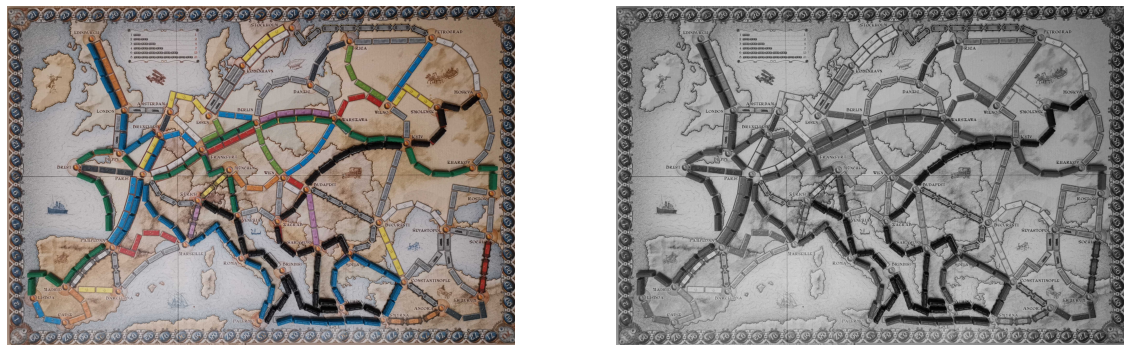

In [55]:
img_orig = np.int16(io.imread('./train/black_blue_green.jpg'))
img = np.float32(cv2.imread('./train/black_blue_green.jpg', 0))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img_orig)
ax[0].axis('off')
ax[1].imshow(img, cmap = 'gray')
ax[1].axis('off');

## Make some templates and take average of them

(60, 60)

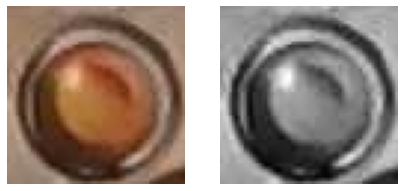

In [259]:
template = img_orig[220:280,620:680]
template_gray = img[220:280,620:680]
fig, ax = plt.subplots(1, 2, figsize=(7, 5))
ax[0].imshow(template)
ax[0].axis('off')
ax[1].imshow(template_gray, cmap='gray')
ax[1].axis('off');
template_gray.shape

(60, 60)

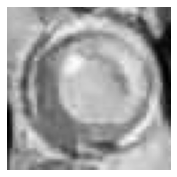

In [260]:
template_gray1 = img[2285:2345,2537:2597]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray1, cmap = 'gray')
plt.axis('off');
template_gray1.shape

(60, 60)

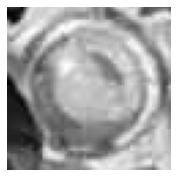

In [261]:
template_gray2 = img[2380:2440,2855:2915]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray2, cmap = 'gray')
plt.axis('off');
template_gray2.shape

(60, 60)

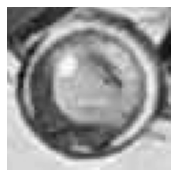

In [276]:
template_gray3 = img[1803:1863,1338:1398]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray3, cmap = 'gray')
plt.axis('off');
template_gray3.shape

(60, 60)

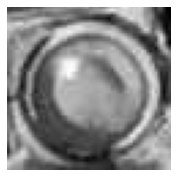

In [328]:
template_gray4 = img[1833:1893,2358:2418]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray4, cmap = 'gray')
plt.axis('off');
template_gray4.shape

(60, 60)

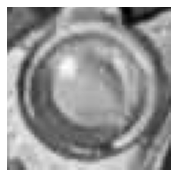

In [344]:
template_gray5 = img[1906:1966,1770:1830]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray5, cmap = 'gray')
plt.axis('off');
template_gray5.shape

(60, 60)

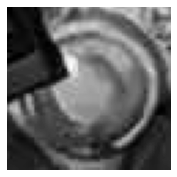

In [396]:
template_gray6 = img[1865:1925,2602:2662]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray6, cmap = 'gray')
plt.axis('off');
template_gray6.shape

(60, 60)

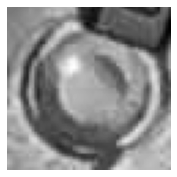

In [419]:
template_gray7 = img[2387:2447,1908:1968]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray7, cmap = 'gray')
plt.axis('off');
template_gray7.shape

(60, 60)

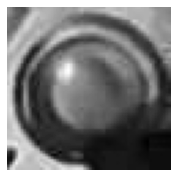

In [456]:
template_gray8 = img[748:808,3272:3332]
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.imshow(template_gray8, cmap = 'gray')
plt.axis('off');
template_gray8.shape

In [457]:
template_aver = template_gray1 + template_gray + template_gray2 + template_gray3 + template_gray4 + template_gray5 + template_gray6 + template_gray7 + template_gray8

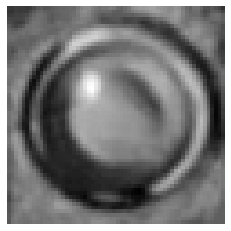

In [458]:
plt.imshow(template_aver, cmap='gray')
plt.axis('off');

## Convolution + norm

In [199]:
def convolve(image, kernel, normed=False):
    assert image.ndim == kernel.ndim == 2   #check dimension
    
    shape = np.array(image.shape) - kernel.shape + 1
    result = np.empty(shape, dtype=float)
    h, w = kernel.shape
    
    if normed:
        kernel_normed = kernel - np.mean(kernel)
        k_norm = np.sum(kernel_normed ** 2)
        
    for i, j in np.ndindex(*shape):
        if normed:
            patch = image[i:i + h, j:j + w]
            patch_normed = patch - np.mean(patch)
            result[i, j] = np.sum(patch_normed * kernel_normed) / np.sqrt(np.sum(patch_normed ** 2) * k_norm)
        else:
            result[i, j] = (image[i:i + h, j:j + w] * kernel).sum()
            
    return result

    
def convolve_same(image, kernel, normed=False):
    # pad image before convolution to obtain same resulting shape
    delta = np.array(kernel.shape) - 1
    # left and right padding
    left = delta // 2
    right = delta - left
    padding = np.array([left, right]).T

    image = np.pad(image, padding, mode='constant') 
    return convolve(image, kernel, normed=normed)

## Normalized convolution

In [459]:
corr_conv = convolve_same(img, template_aver, normed=True)
corr_skimage = match_template(img, template_aver, pad_input=True)

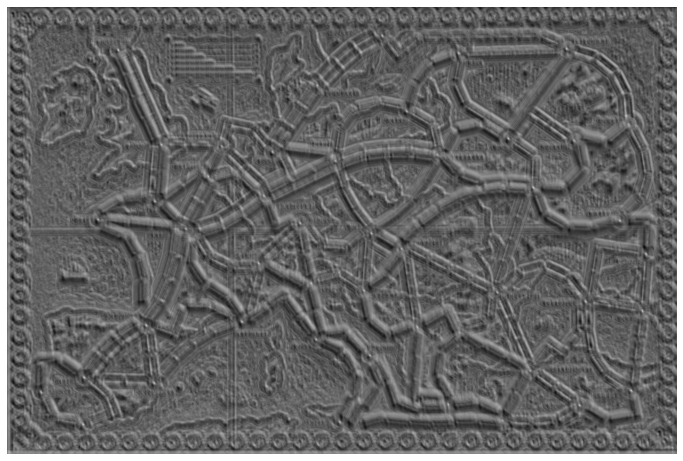

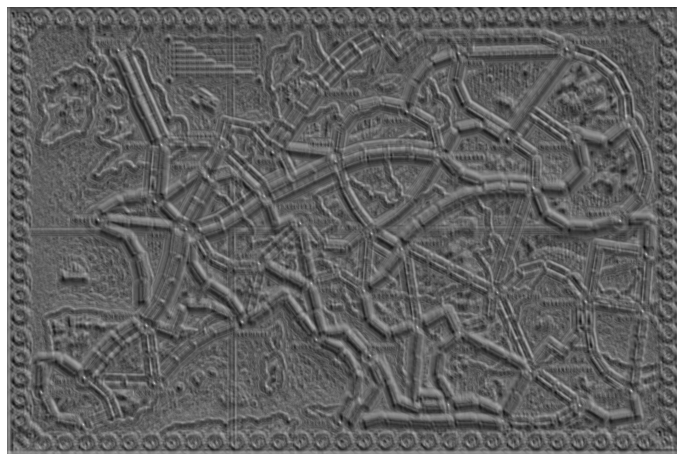

In [460]:
show(corr_conv)
show(corr_skimage)

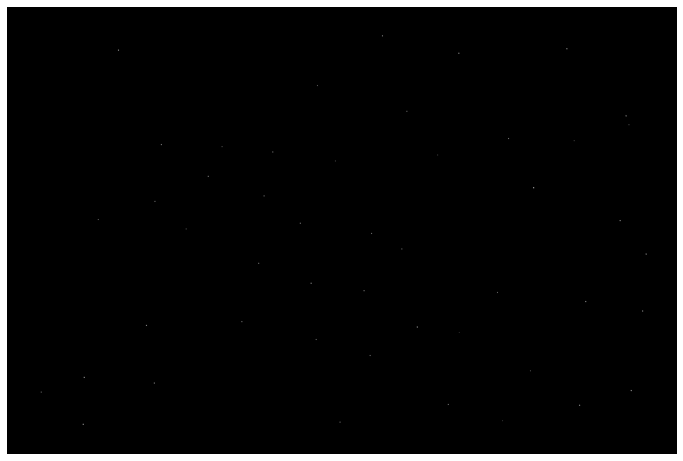

In [471]:
show(corr_conv > 0.5)

## Finding oblects: thresholding and local maximum

In [462]:
# maximum -> center of mass
def get_local_centers(corr, th):
    lbl, n = label(corr >= th, connectivity=2, return_num=True)
    return np.int16([np.round(np.mean(np.argwhere(lbl == i), axis=0)) for i in range(1, n + 1)])


def plot_rectangles(img, points, bbox_shape):
    points = np.int16(points)[::, ::-1]
    res_img = np.int16(img.copy())
    for pt in points:
        cv2.rectangle(res_img, (pt[0] - bbox_shape[0] // 2, pt[1] - bbox_shape[1] // 2),
                      (pt[0] + bbox_shape[0] // 2, pt[1] + bbox_shape[1] // 2), (255, 0, 0), 10)
    return res_img

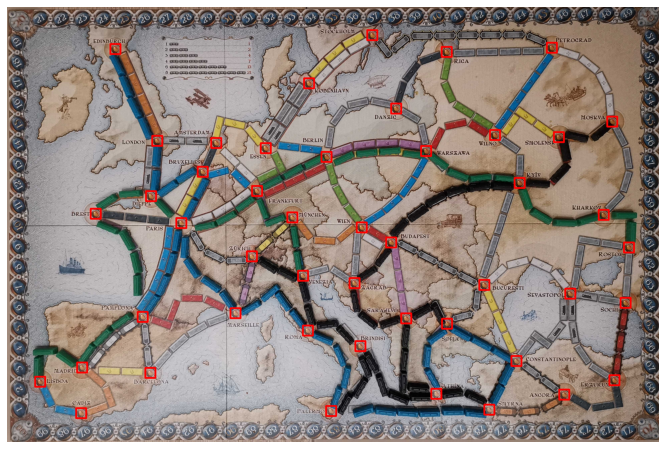

In [477]:
points = get_local_centers(corr_conv, 0.54)
res = plot_rectangles(img_orig, points, template_aver.shape)

plt.figure(figsize = (14,8))
plt.imshow(res, cmap='gray')
plt.axis('off');

## Treshold

In [465]:
sld = IntSlider(value=50, min=0, max=100, step=1, continuous_update=False)

def vary_corr_th(th):
    points = get_local_centers(corr_conv, th / 100)
    res = plot_rectangles(img_origin, points, template_aver.shape)    
    show(res, cmap=None)

In [466]:
interact(vary_corr_th, th=sld);

interactive(children=(IntSlider(value=50, continuous_update=False, description='th'), Output()), _dom_classes=…